In [1]:
#importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats.stats import pearsonr 

In [2]:
#reading data files and parsing to pandas
survey = pd.read_csv("Assignment 1 - survey data (1).csv", encoding="utf-8")
steps = pd.read_csv("Assignment 1 - steps data (1).csv", encoding="utf-8", sep=";", parse_dates=True)

In [3]:
#merging the survey and steps data
df = pd.merge(survey,steps, on="id")
df.head()

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#get a general overview of the data fram uisng info and describe
df.info()
df.describe()
#there are 929 records with 338 variables. Most of the variables are dates.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 338 entries, id to 13-5-2014
dtypes: float64(331), int64(2), object(5)
memory usage: 2.4+ MB


,id,hh_size,height,weight,waist,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,925.000000,927.000000,928.000000,22.000000,231.000000,264.000000,283.000000,327.000000,...,108.000000,104.000000,95.000000,93.000000,85.000000,96.000000,102.000000,95.000000,84.000000,0.0
mean,465.000000,2.329386,171.754595,72.045307,85.794181,2253.454545,8968.935065,10412.117424,7631.215548,7981.666667,...,8515.407407,8564.076923,8653.694737,8767.419355,9788.188235,10236.531250,10668.343137,8982.021053,8287.642857,NaN
std,268.323499,1.227912,9.162748,15.097312,15.446036,3479.099469,6237.568765,6438.136783,6653.465770,5019.270194,...,6458.522857,5908.224967,5632.033925,6293.539317,7834.759260,7095.325248,7413.330103,7865.926206,5949.435585,NaN
min,1.000000,1.000000,145.000000,37.000000,0.000000,20.000000,12.000000,25.000000,14.000000,10.000000,...,19.000000,12.000000,90.000000,17.000000,4.000000,664.000000,103.000000,12.000000,221.000000,NaN
25%,233.000000,1.000000,165.000000,61.000000,77.000000,185.500000,4599.500000,6043.500000,2836.500000,4436.500000,...,3568.500000,5169.250000,4615.500000,4553.000000,5027.000000,5417.000000,5554.750000,3604.500000,3873.000000,NaN
50%,465.000000,2.000000,172.000000,71.000000,85.000000,539.000000,8368.000000,9338.000000,5983.000000,7740.000000,...,7115.500000,7870.000000,7793.000000,7661.000000,8172.000000,7825.000000,9770.000000,6544.000000,7391.500000,NaN
75%,697.000000,3.000000,179.000000,80.000000,94.000000,2404.750000,12374.000000,13865.000000,10438.500000,11105.000000,...,12211.000000,10617.750000,10939.000000,11898.000000,14189.000000,12804.750000,14313.500000,11555.500000,10769.250000,NaN
max,929.000000,11.000000,197.000000,155.000000,175.000000,11157.000000,44944.000000,45046.000000,40392.000000,29862.000000,...,33526.000000,30262.000000,29025.000000,38400.000000,40384.000000,33379.000000,43561.000000,36031.000000,33660.000000,NaN


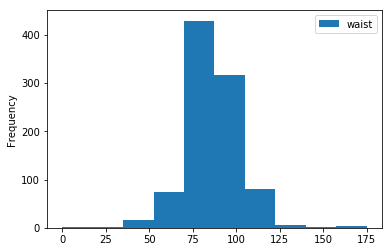

In [5]:
#check the data for waist circumference
#plot histogram with 10 bins to get distribution of waist measurement
waist = df.sort_values("waist", ascending = True)
df.plot(kind='hist', y = "waist", bins = 10)

Filtering extreme values of waist circumference (WC)
Smallest WC ever recorded was 38.1 cm. Source:https://www.onaverage.co.uk/body-averages/average-waist-size
Largest WC 300cm. source:http://guinness-world-records.wikia.com/wiki/Largest_Waist_(2004). He was morbidly obese
Given this, the lower limit fo waist circumference was set at 40cm
The upper limit was triciker. WC larger than 120 contains significant health risk but other factors like height are at play. 
Source:https://www.myvmc.com/investigations/assessing-central-obesity-waist-circumference/. And 300cm, is unrealistic.

In [6]:
#to investigate further I isolated the high waist values higher than 120
high_WC = df[df['waist'] > 120]
high_WC
#there are 12 records. Looking at height and weight in relation to WC it seems most of those above 130 are impossible values

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
121,122,Bordeaux,male,<25,1,single,master or doctorate,172.0,72.0,172.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,237,Lille,male,25-34,2,couple,bachelor,175.0,78.0,125.0,...,4815.0,6880.0,NaN,15148.0,11640.0,7870.0,4567.0,4286.0,12892.0,NaN
309,310,Bordeaux,female,25-34,2,couple,master or doctorate,157.0,59.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,387,Lyon,male,<25,2,couple,master or doctorate,193.0,95.0,125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,390,Montpellier,male,45-54,2,other,master or doctorate,183.0,149.0,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,509,Lille,male,<25,2,couple,bachelor,186.0,131.0,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,550,Lyon,female,<25,1,other,master or doctorate,164.0,59.0,175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,736,Lyon,female,35-44,3,family,bachelor,167.0,140.0,132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
758,759,Lyon,male,25-34,1,single,master or doctorate,186.0,128.0,131.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
797,798,Lyon,male,45-54,2,couple,high school,185.0,140.0,132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#this function is to filter out both extremes in Waist circumference in the waist column of the dataframe
def filter_WC(x):
    if(x > 130.0): 
        return float('NaN')
    if(x < 40.0): 
        return float('NaN')
    else: 
        return x

df['waist'] = df['waist'].apply(filter_WC)
#see the head of the resulting dataframe
df.head()

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


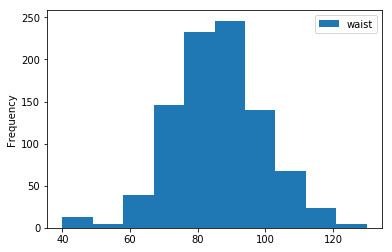

In [8]:
#plot the histogram agin with values filtered out
waist = df.sort_values("waist", ascending = True)
df.plot(kind='hist', y = "waist", bins = 10)

In [9]:
#A plot of a time series of your choice, e.g. mean steps per day over all participants
#calculating the mean steps from the steps dataframe and saving this new series
steps_mean = steps.mean()
steps_mean.head(5)

id             465.000000
20-6-2013     2253.454545
21-6-2013     8968.935065
22-6-2013    10412.117424
23-6-2013     7631.215548
dtype: float64

In [10]:
#The first column containes "id" values which we do not need for the time series plot. 
# I can either drop the id row from mean series or set it as index
steps_n = steps.drop("id", axis=1)  #created a new df with id row dropped
steps_n.head()

,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2626.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,830.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,10710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#creating a new dataframe with mean steps
steps_n_mean = pd.DataFrame(steps_n.mean())
steps_n_mean = steps_n_mean.reset_index(drop=True)#resets the index of dates as numbers. and drops the dates column
steps_n_mean.head(5)

,0
0,2253.454545
1,8968.935065
2,10412.117424
3,7631.215548
4,7981.666667


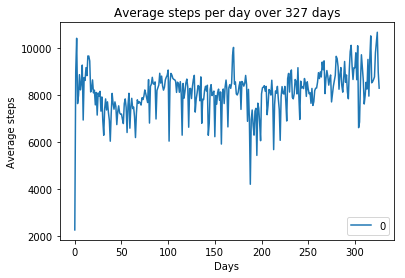

In [12]:
#plotting distribution
sns.lineplot(data=steps_n_mean)
plt.xlabel('Days')
plt.ylabel('Average steps')
plt.title('Average steps per day over 327 days')
plt.show()
#shows mean steps each day for the 327 days recorded

In [13]:
#An analysis of one quantitative variable 
#doing an analysis of bmi. To do this I have to calcuate the value using bmi = kg/m2 
df["bmi"] = df["weight"]/(df["height"]/100)**2
df.head()

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,bmi
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.513542
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.582709
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.971336
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.661152
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.343516


In [14]:
#First, calculate the mean and media values of bmi
bmi_mean = df['bmi'].mean()
bmi_median = df['bmi'].median()
print(f"Mean BMI: {bmi_mean}\nMedian BMI: {bmi_median}") #print result
#adding other values of interest
bmi_max = df["bmi"].max()
bmi_min = df["bmi"].min()
print(f"Highest BMI: {bmi_max}\nLowest BMI: {bmi_min}") #print result

Mean BMI: 24.325495965661556
Median BMI: 23.76543209876543
Highest BMI: 50.199003191222346
Lowest BMI: 15.826092149661081


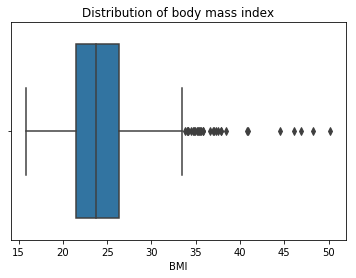

In [15]:
#boxplot of bmi distributions
sns.boxplot(df["bmi"])
plt.title('Distribution of body mass index')
plt.xlabel('BMI')
plt.show()
#notice the outliers for larger BMIs

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


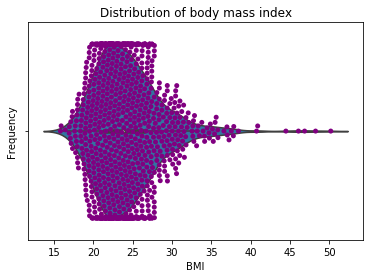

In [16]:
#Violin plot of bmi in dataframe for better visualisation of upper values distrbution
sns.violinplot(df["bmi"])
sns.swarmplot(df["bmi"], color='purple')
plt.title('Distribution of body mass index')
plt.ylabel('Frequency')
plt.xlabel('BMI')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


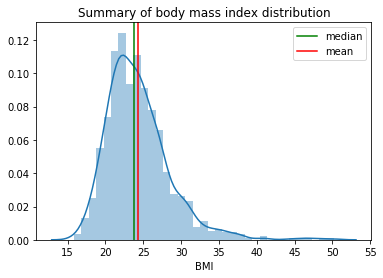

In [17]:
#final distribution plot to include density, mean and median values
df['bmi'].name = 'bmi' #Create variable for plotting

bmi = df['bmi'].dropna() #Selecting the bmi column. Dropping NA values, without this step, throws up error
sns.distplot(bmi, kde=True) #kde=true adds density plot
plt.title('Summary of body mass index distribution')
plt.xlabel("BMI")

#adding vertical lines in the histogram for mean and median values
plt.axvline(bmi_median, 0, 100, color='green', label='median') #from y = 0 to y=100, given the distribution witnessed 
plt.axvline(bmi_mean, 0, 100, color='red', label='mean')
plt.legend()
plt.show()
#the plot is right skewed with some outlier values

Summary statistics
Mean BMI: 24.33
Median BMI: 23.77
Highest BMI: 50.20
Lowest BMI: 15.83
The BMI distribution is positively skewed or right skewed due to the long tail on the right side of the histogram. In addition, the mean is greater than the median, which is typical for right skewed data. Most of the outliers, as seen in the violin plot, are on the higher end of the BMI scale, with 51.2 as the highest recorded BMI.
From the box plot we see that 50% of the population have a BMI between 21 and 26. Most of the outliers are values above 34 which are outside the whiskers of the box plot. Scientifically speaking, the higher the BMI, the more overweight the subject is. Given that the research was to study exercise habits, perhaps those with a high BMI were deliberatly chosen because they might have more motivation to use the fitbit. For this reason all the outliers were left in the data set.

In [18]:
#The relation of mean steps per participant with at least 2 other quantitative variables(e.g. weight, height).
#first recall the earlier dataframe steps_n whcich was used to calculate mean per day (steps_n)
steps_n['mean'] = steps_n.mean(axis=1)  #axis = 1, to calculate mean for each row
df["mean_steps"] = steps_n["mean"]  #adding the mean column to merged dataframe
df.head(5)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,bmi,mean_steps
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.513542,6757.911765
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.582709,3403.964706
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.971336,4986.550505
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.661152,6264.478261
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.343516,5516.014493


In [19]:
#creating a subset with 2 other quantitative variables and using pairplots the investigate realtionships
steps_relate = df[["bmi", "waist", "weight", "height", "hh_size", "mean_steps"]]
steps_relate = steps_relate.dropna()  #to drop null values froom the data frame
steps_relate.head()

,bmi,waist,mean_steps,weight,height,hh_size
0,18.513542,78.0,6757.911765,62.0,183.0,2
1,22.582709,75.0,3403.964706,60.0,163.0,2
2,21.971336,60.0,4986.550505,65.0,172.0,2
3,25.661152,95.0,6264.478261,85.0,182.0,3
4,22.343516,81.0,5516.014493,70.0,177.0,2


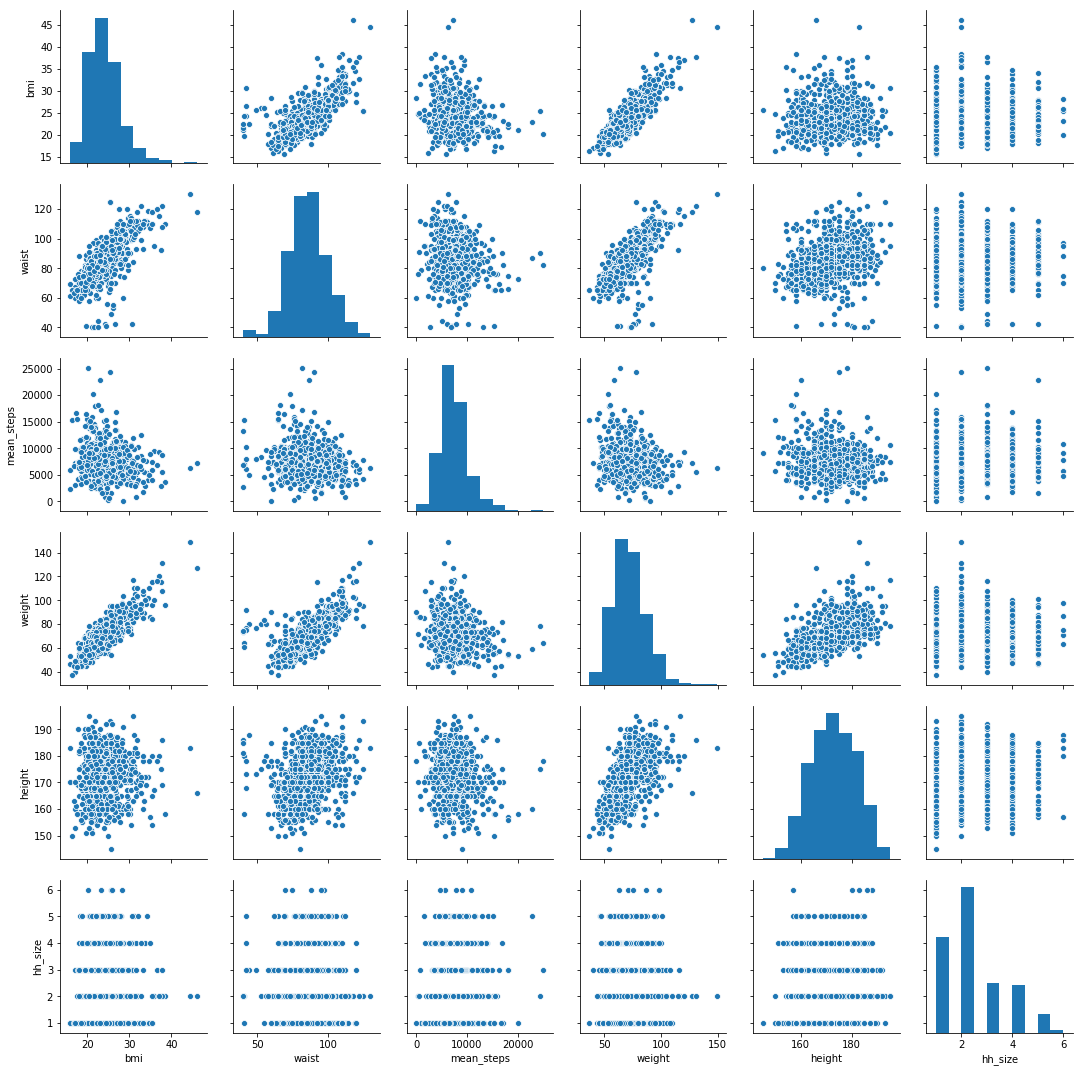

In [20]:
sns.pairplot(steps_relate)
plt.show()

The distribution of meansteps is right skewed. However defining the relationship bwtween the average steps of the participant and their BMI and wait size is more fuzzy. the scatter plot suggests that cebtral trend is that the higher the BMI, the more steps are taken. However there are more outliers of the trend at the lower end of the spectrum than at the upper end.

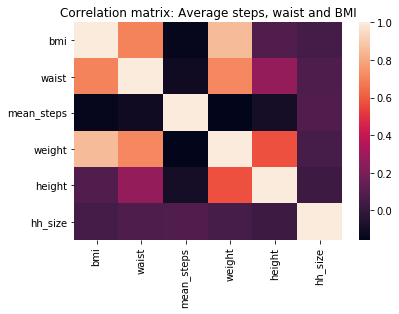

In [21]:
#Correlation matrix including all 3 variables
corr = steps_relate.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation matrix: Average steps, waist and BMI')
plt.show()

From the heatmap, it seems the correlation between the variables is even more tenous than seen in the scatterplot.

In [22]:
#Pearson’s correlation for the 2 relations
r_bmi = pearsonr(steps_relate['mean_steps'],steps_relate['bmi'])
r_waist = pearsonr(steps_relate['mean_steps'],steps_relate['waist'])

print(f"Correlation between average steps and Body Mass Index\n r is: {r_bmi[0]}\n p-value is: {r_bmi[1]}")
print(f"Correlation between average steps and waist circumference\n r is {r_waist[0]}\n p-values is: {r_waist[1]}")

Correlation between average steps and Body Mass Index
 r is: -0.14069770996461253
 p-value is: 0.00018221821311099808
Correlation between average steps and waist circumference
 r is -0.10899267706201249
 p-values is: 0.003811817950878387
